# WHO İS CHURN?

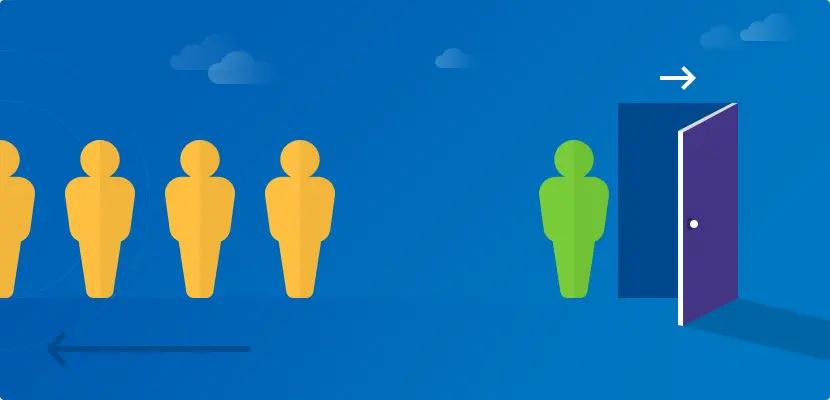

# Classification Project


In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample



# Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
df = pd.read_csv('dataset/customer.csv')
df.head(8).T

,0,1,2,3,4,5,6,7
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC
gender,Female,Male,Male,Male,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes,No
tenure,1,34,2,45,2,8,22,10
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes


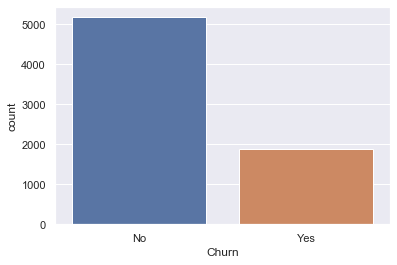

In [3]:
#let's show our target vaariable(CHURN)! 
sns.set(style="darkgrid")
ax = sns.countplot(x="Churn", data=df)

In [4]:
# Checking the columns in the dataset.
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## FİLLİNG THE LOST VALUES

In [6]:
df.TotalCharges.sort_values(ascending=False)

2845     999.9
3353     999.8
3686    999.45
5598     998.1
6646    997.75
         ...  
5218          
753           
4380          
3826          
936           
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
df[df['TotalCharges']== ' '] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df["TotalCharges"] = df["TotalCharges"].apply(str.strip).replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

In [9]:
#Since it's a new member;
#it would be reasonable to fill in the 'TotalCharges' lost values with 'MonthlyCharges'values.
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float32
Churn               7043 non-null object
dtypes: float32(1), float64(1), 

In [11]:
# No longer, there is no lost value in dataframe.
df[df['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## FEATURES SCRUTİNY

In [12]:
f_list = df.columns
for col in f_list:
    liste=df[col].unique()
    print(col, liste)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

### Target Features

In [13]:
#We can convert our target variable to 1 and 0 values.
df["Churn"]=df.Churn.replace({'Yes':1,'No':0})

### Numerical Features

When we consider only Numerical Features values with the help of the graphics below:

1. We observe the effect of the values in our variables on the churn through graphs. 
2. We observe that short-term members leave their membership if they pay high value.
3. We find that the members paying at the lowest limit remain loyal.
4. We understand that those who have been customers for a long time do not leave even if they continue to pay high.

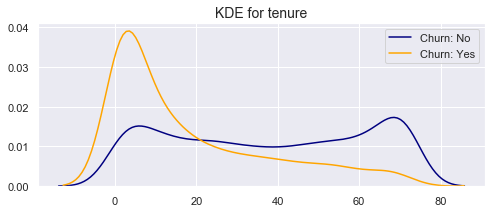

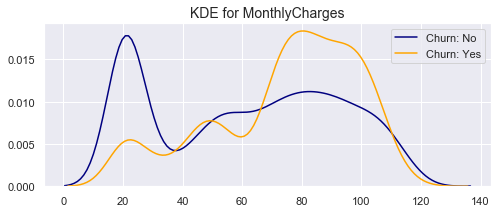

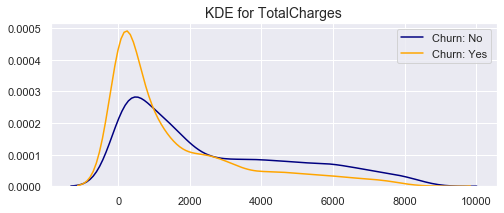

In [14]:
def kdeplot(feature):
    plt.figure(figsize=(8,3))
    plt.title("KDE for {}".format(feature), size=14)
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

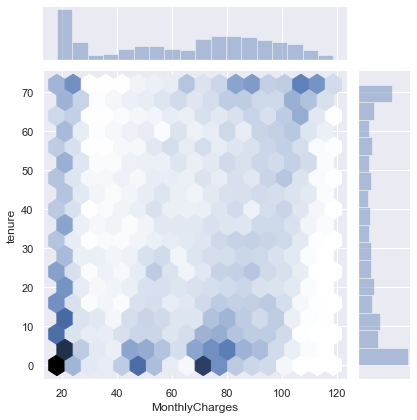

In [15]:
sns.jointplot(x=df["MonthlyCharges"], y=df["tenure"], kind='hex')

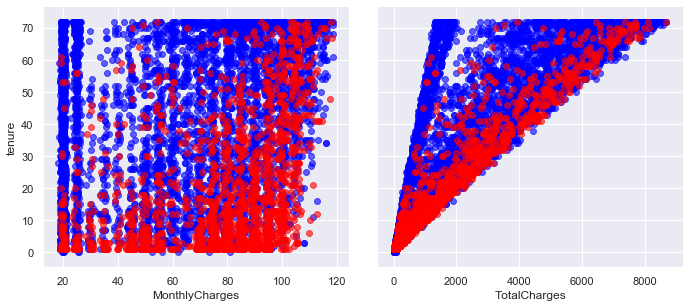

In [16]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], 
                 height=4.5, hue="Churn", aspect=1.1,palette=['blue','red'])
ax = g.map(plt.scatter, alpha=0.6)

### Categorical Features

This dataset has 16 categorical features:

Six binary features (Yes/No)
Nine features with three unique values each (categories)
One feature with four unique values

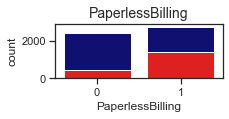

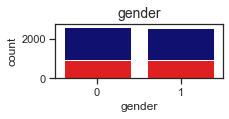

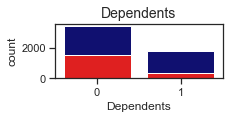

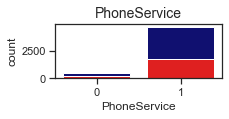

In [60]:
def countplot(feature):
    plt.figure(figsize=(3,1))
    plt.title("{}".format(feature), size=14)
    ax0 = sns.countplot(df[df['Churn'] == 0][feature].dropna(), color= 'navy')
    ax1 = sns.countplot(df[df['Churn'] == 1][feature].dropna(), color= 'red')
countplot('PaperlessBilling')
countplot('gender')
countplot('Dependents')
countplot('PhoneService')

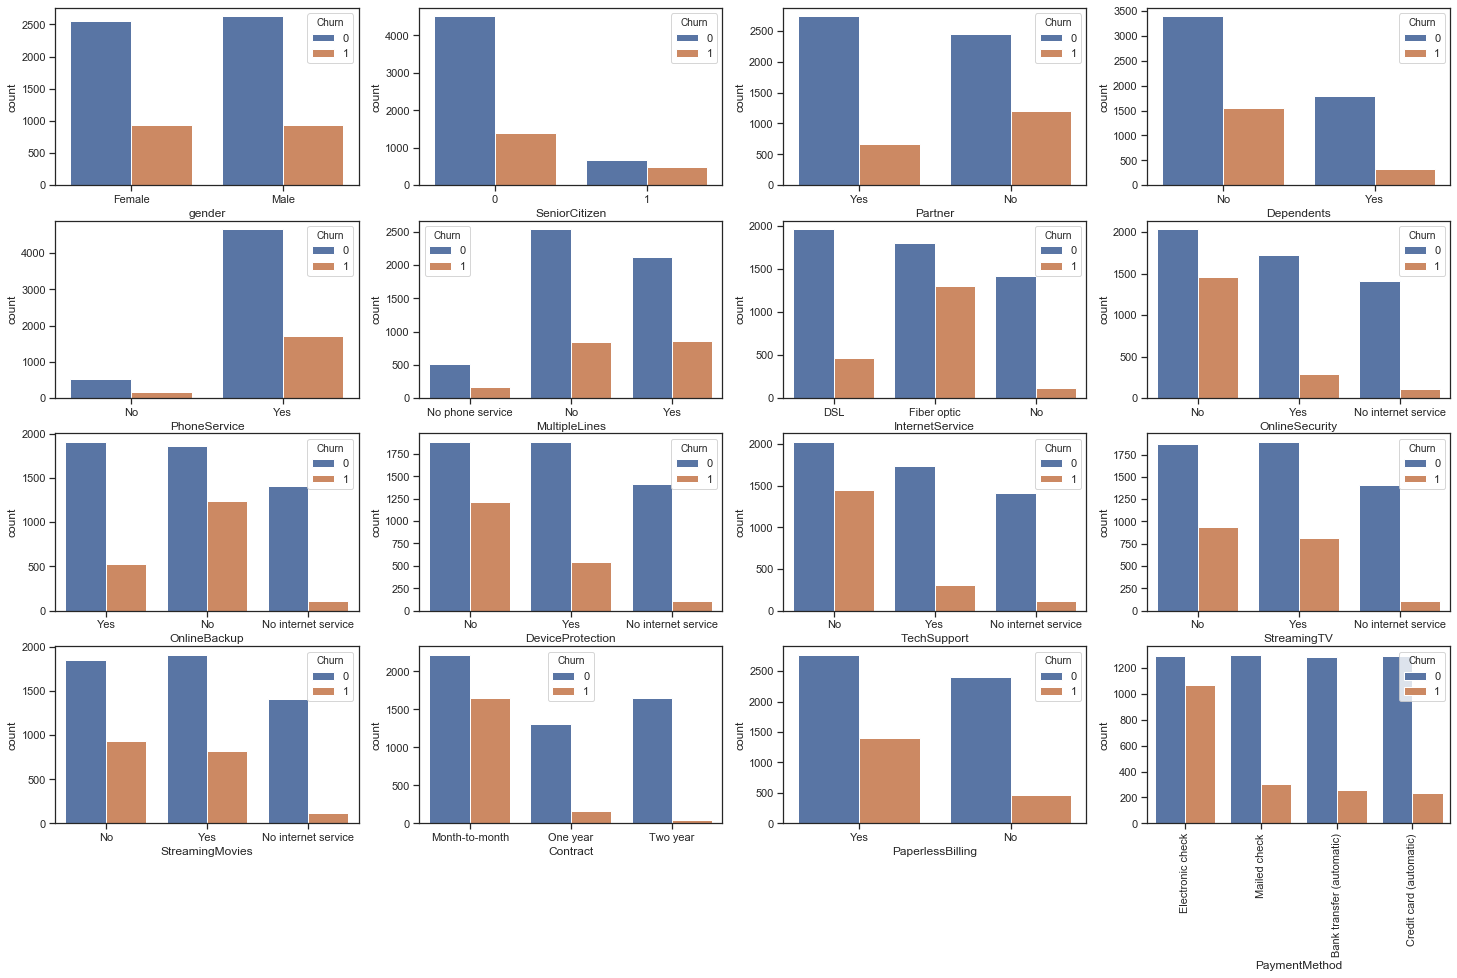

In [18]:
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (25,15))
sns.countplot(x = "gender", data = df, ax=axes[0][0], hue="Churn")
sns.countplot(x = "SeniorCitizen", data = df, ax=axes[0][1], hue="Churn")
sns.countplot(x = "Partner", data = df, ax=axes[0][2], hue="Churn")
sns.countplot(x = "Dependents", data = df, ax=axes[0][3], hue="Churn")
sns.countplot(x = "PhoneService", data = df, ax=axes[1][0], hue="Churn")
sns.countplot(x = "MultipleLines", data = df, ax=axes[1][1], hue="Churn")
sns.countplot(x = "InternetService", data = df, ax=axes[1][2], hue="Churn")
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][3], hue="Churn")
sns.countplot(x = "OnlineBackup", data = df, ax=axes[2][0], hue="Churn")
sns.countplot(x = "DeviceProtection", data = df, ax=axes[2][1], hue="Churn")
sns.countplot(x = "TechSupport", data = df, ax=axes[2][2], hue="Churn")
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][3], hue="Churn")
sns.countplot(x = "StreamingMovies", data = df, ax=axes[3][0], hue="Churn")
sns.countplot(x = "Contract", data = df, ax=axes[3][1], hue="Churn")
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[3][2], hue="Churn")
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[3][3], hue="Churn")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout
plt.show(fig)

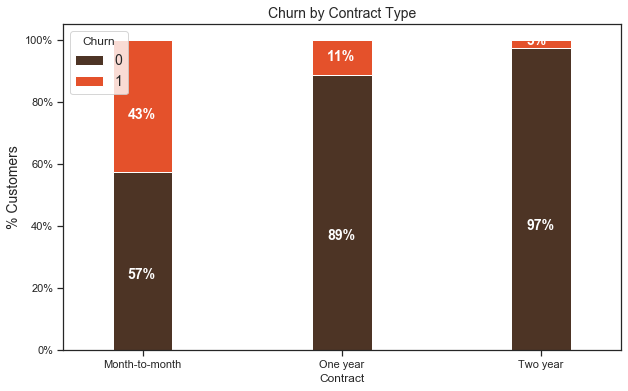

In [19]:
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

When we consider all categoric variables, we can see that some of them are effective on our target variable.
We can better observe which of these variables in our correlation matrix below.

### Correlation Matrix With All Features

In [20]:
df["gender"]=df.gender.replace({'Female':1,'Male':0})
df["Partner"]=df.Partner.replace({'Yes':1,'No':0})
df["Dependents"]=df.Dependents.replace({'Yes':1,'No':0})
df["PhoneService"]=df.PhoneService.replace({'Yes':1,'No':0})
df["PaperlessBilling"]=df.PaperlessBilling.replace({'Yes':1,'No':0})

Text(0.5, 1, '-Correlation Matrix-')

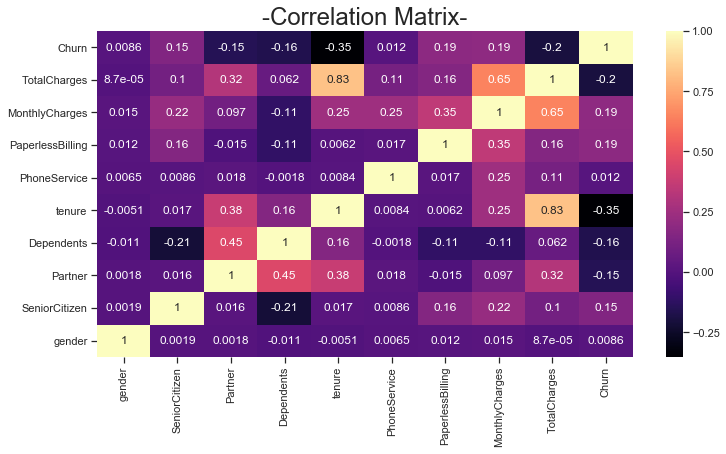

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='magma', annot=True)
plt.ylim(0,10)
plt.title('-Correlation Matrix-', size=24)

In [22]:
#Let's look at which variables are more effective on Churn and let's sort them.
df.corr().Churn.abs().sort_values()

gender              0.008612
PhoneService        0.011942
Partner             0.150448
SeniorCitizen       0.150889
Dependents          0.164221
PaperlessBilling    0.191825
MonthlyCharges      0.193356
TotalCharges        0.198347
tenure              0.352229
Churn               1.000000
Name: Churn, dtype: float64

# Prediction with Logistic Regression

In [23]:
df_dummies = pd.get_dummies(df[[ 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']])
df_dummies.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [24]:
df_dummies = pd.concat([df,df_dummies], axis=1)
df_dummies=df_dummies.drop(columns = ['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'])
df_dummies.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1


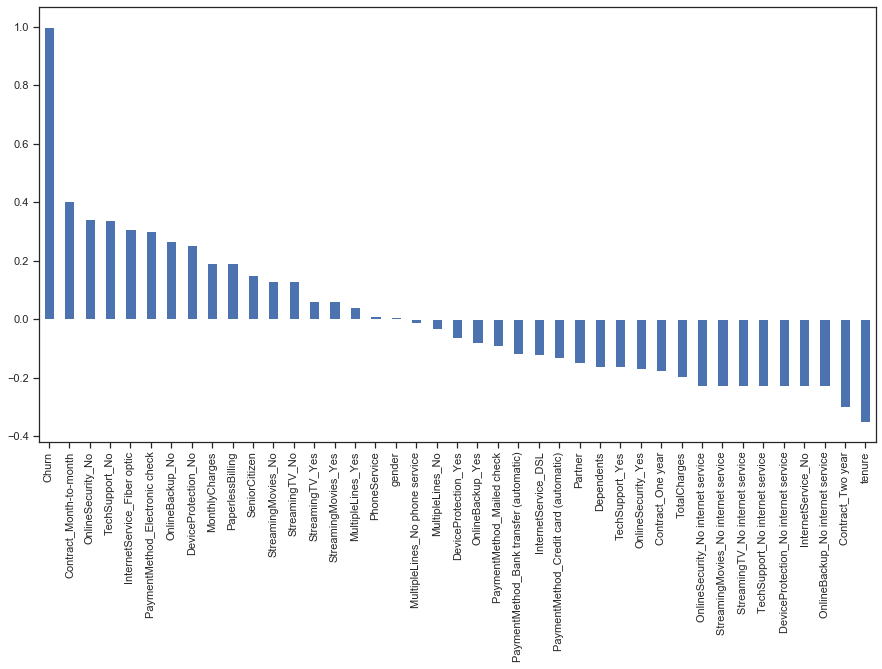

In [25]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Above, we converted our variables to dummy values in order to use them successfully in Logistic Regression and with the help of graphics we observed which values have more importance. Now we can start our model with Logistic Regression.

In [26]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn','customerID'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [29]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8054898248935163


AxesSubplot(0.125,0.125;0.775x0.755)


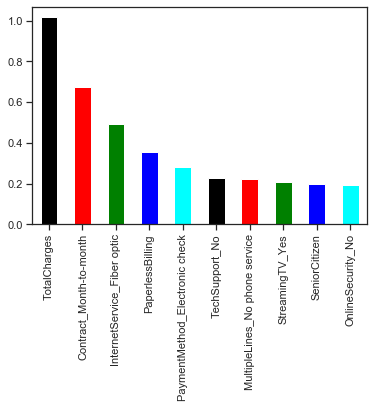

In [30]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan']))

AxesSubplot(0.125,0.125;0.775x0.755)


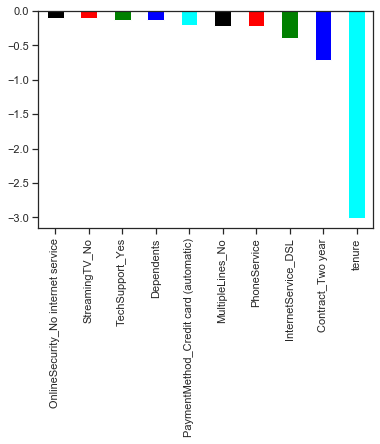

In [31]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan']))

In [32]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'The accuracy of the model in train data : {:.2f}'.format(train_accuracy), 
      'The accuracy of the model in test data   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
--------------------
The accuracy of the model in train data : 0.81
The accuracy of the model in test data   : 0.81


In [33]:
model_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_mnm.fit(X_train, y_train)
train_accuracy = model_mnm.score(X_train, y_train)
test_accuracy = model_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
            'The accuracy of the model in train data : {:.2f}'.format(train_accuracy), 
            'The accuracy of the model in test data   : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
The accuracy of the model in train data : 0.81
The accuracy of the model in test data   : 0.80


In [34]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_Values','accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'train_accuracy', 'test_accuracy'])

for c in C_values:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C Value':c,'train_accuracy' : lr.score(X_train, y_train),
                                                    'test_accuracy': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)    

,C Value,train_accuracy,test_accuracy
0,0.001,0.737323,0.733554
1,0.010,0.798986,0.796025
2,0.100,0.804057,0.805490
3,1.000,0.805071,0.805490
4,10.000,0.806491,0.803597
5,100.000,0.806491,0.804543
6,1000.000,0.806694,0.804543


In [35]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
Churn_model = LogisticRegression()
Churn_model.fit(X_train, y_train)

tahmin_eğitim =Churn_model.predict(X_train)
tahmin_test = Churn_model.predict(X_test)

In [36]:
tahmin_test_ihtimal = Churn_model.predict_proba(X_test)[:,1]

In [37]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_train, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[3678  426]
 [ 683  847]]
Hata Matrisi (Test verileri)
------------------------------
[[942 128]
 [140 199]]


In [38]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 942
Doğru pozitif sayısı   : 199
Yanlış pozitif sayısı  : 128
Yanlış negatif sayısı  : 140


In [39]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  Churn_model.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.8097941802696949
Hesaplanan doğruluk değeri      :  0.8097941802696949
accuracy_score() değeri         :  0.8097941802696949


In [40]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1070
           1       0.61      0.59      0.60       339

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



NameError: name 'f1_score' is not defined

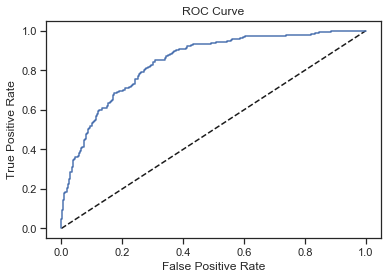

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

AUC Değeri :  0.8421001847103907


In [43]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [44]:
model_olustur(X,y)

Modelin doğruluk değeri :  0.8055358410220014
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.54      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634

Test veri kümesi
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_sample(X, y)

In [49]:
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.778743961352657
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4139
           1       0.76      0.81      0.78      4139

    accuracy                           0.78      8278
   macro avg       0.78      0.78      0.78      8278
weighted avg       0.78      0.78      0.78      8278

Test veri kümesi
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1035
           1       0.76      0.82      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [51]:
from imblearn.over_sampling import ADASYN

In [52]:
ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [53]:
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.7382098171318575
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      4139
           1       0.72      0.79      0.75      4169

    accuracy                           0.74      8308
   macro avg       0.74      0.74      0.74      8308
weighted avg       0.74      0.74      0.74      8308

Test veri kümesi
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1035
           1       0.71      0.80      0.75      1043

    accuracy                           0.74      2078
   macro avg       0.74      0.74      0.74      2078
weighted avg       0.74      0.74      0.74      2078



In [54]:
from sklearn.utils import resample

In [55]:
Churn_no = df_dummies[df_dummies.Churn == 0]
Churn_yes = df_dummies[df_dummies.Churn == 1]

Churn_yes_increased = resample(Churn_yes,
                                     replace = True,
                                     n_samples = len(Churn_no),
                                     random_state = 111)

increased_df = pd.concat([Churn_no, Churn_yes_increased])
increased_df.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [56]:
y = increased_df['Churn'].values
X = increased_df.drop(columns = ['Churn','customerID'])

model_olustur(X,y)

Modelin doğruluk değeri :  0.7642512077294686
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4139
           1       0.75      0.80      0.77      4139

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278

Test veri kümesi
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1035
           1       0.75      0.80      0.77      1035

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070



# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=10000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7676328502415459


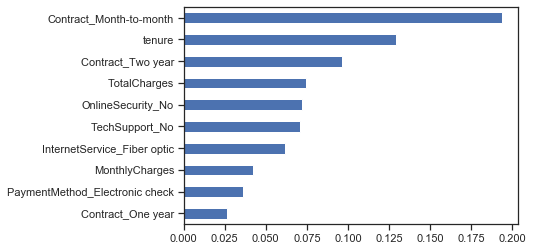

In [58]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')